## Kwadratury Gaussa 

#### Zadanie 1
Zaimplementuj całkowanie metodą Gaussa-Legendre stopnia 2-5.

Wyznaczyć wartości całek dla funkcji:

- $f(x) = 3x^3 - 1$ 
- $f(x) = 2 * x^2$
- $f(x) = 4*sin(x)$ 

Oczywiście, oblicz dokładne wartości całek oznaczonych! Porównać dokładność uzyskanych rezultatów z dokładnym wynikiem oraz z kwadraturami z poprzedniego ćwiczenia.

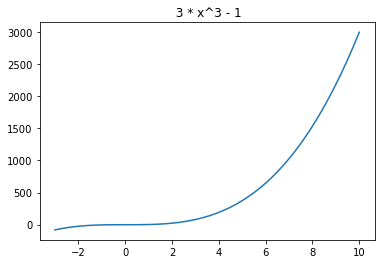

Value counted with Rectangle method -->  7430.863700000001
Value counted with Trapeze method -->  7430.863700000001
Value counted with Simpson method -->  6926.440835773335
Value counted with Gauss-Legendre method with different orders:
	 2  --> 7426.249999999997
	 3  --> 7426.25
	 4  --> 7426.249999999997
	 5  --> 7426.250000000002
Actual value --> 7426.25
Estimating errors:
For Rectangle method 0.0006212691466084215
For Trapeze method 0.0006212691466084215
For Simpson method 0.06730303507512747
For Gauss-Legendre method with different orders:
	 2  --> 3.674107531148002e-16
	 3  --> 0.0
	 4  --> 3.674107531148002e-16
	 5  --> 2.4494050207653345e-16


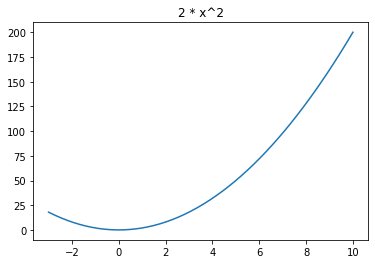

Value counted with Rectangle method -->  684.9596
Value counted with Trapeze method -->  684.9596
Value counted with Simpson method -->  650.8954746666667
Value counted with Gauss-Legendre method with different orders:
	 2  --> 684.6666666666665
	 3  --> 684.6666666666669
	 4  --> 684.6666666666665
	 5  --> 684.666666666667
Actual value --> 684.6666666666667
Estimating errors:
For Rectangle method 0.0004278481012657458
For Trapeze method 0.0004278481012657458
For Simpson method 0.049325012658227904
For Gauss-Legendre method with different orders:
	 2  --> 3.3209397581776833e-16
	 3  --> 1.6604698790888417e-16
	 4  --> 3.3209397581776833e-16
	 5  --> 3.3209397581776833e-16


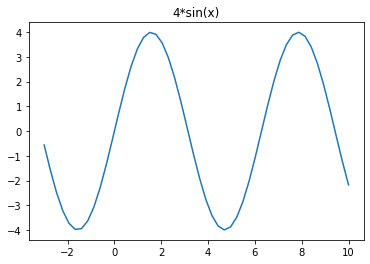

Value counted with Rectangle method -->  -0.6002792799359659
Value counted with Trapeze method -->  -0.6002792799359659
Value counted with Simpson method -->  -0.3050950858701717
Value counted with Gauss-Legendre method with different orders:
	 2  --> 14.938592703984364
	 3  --> -11.318661260752712
	 4  --> 2.184646819089511
	 5  --> -1.0050829574430955
Actual value --> -0.6036838700959708
Estimating errors:
For Rectangle method 0.005639690454978851
For Trapeze method 0.005639690454978851
For Simpson method 0.49461116822341283
For Gauss-Legendre method with different orders:
	 2  --> 25.745721136477435
	 3  --> 17.749318677262863
	 4  --> 4.618859020934594
	 5  --> 0.6649160383949172


In [100]:
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

def GaussLegendreQuadrature(func, polyorder, a, b):
    x, w = np.polynomial.legendre.leggauss(polyorder)
    t= 0.5*(x + 1)*(b - a) + a
    gauss = sum(w * np.vectorize(func)(t)) * 0.5*(b - a)
    return  gauss


def integrateRectangle(start,end,numberOfPoints,function):
    dx=(end-start)/numberOfPoints
    result=0.0
    for i in range (1,numberOfPoints):
        result+=function(start+i*dx)
    result=(result+((function(start)+function(end))/2))*dx
    return result

def integrateTrapez(start,end,numberOfPoints,function):
    result=0
    dx=(end-start)/numberOfPoints
    for i in range (1,numberOfPoints):
        result+=function(start+i*dx)
    result=(result+(function(start)+function(end))/2)*dx
    return result

def integrateSimpson(start,end,numberOfPoints,function):
    result=0
    middleResult=0
    dx=(end-start)/numberOfPoints
    for i in range (1,numberOfPoints):
        x=start+i*dx
        middleResult+=function(x-dx/2)
        if i<numberOfPoints : result+=function(x)
    result=dx/6*(function(start)+function(end)+2*result+4*middleResult)
    return result


f1 = lambda x: 3 * x**3 - 1
f2 = lambda x: 2 * x**2
f3 = lambda x: 4 * np.sin(x)


        
def show(function,start,end,numberOfPoints,funcName):
    x_array=np.linspace(start,end,num=50)
    y_array=function(x_array)
    plt.title(funcName)
    plt.plot(x_array,y_array)
    plt.show()
    

def showIntegral(function,start,end,numberOfPoints,funcName,order):
    show(function,start,end,numberOfPoints,funcName)
    intRectangle=integrateRectangle(start,end,numberOfPoints,function)
    intTrapeze=integrateTrapez(start,end,numberOfPoints,function)
    intSimpson=integrateSimpson(start,end,numberOfPoints,function)
    intGaussL2=GaussLegendreQuadrature(function, order, start,end)
    intGaussL3=GaussLegendreQuadrature(function, order+1, start,end)
    intGaussL4=GaussLegendreQuadrature(function, order+2, start,end)
    intGaussL5=GaussLegendreQuadrature(function, order+3, start,end)
    intReal=integrate.quad(function,start,end)[0]
    print("Value counted with Rectangle method --> ",intRectangle)
    print("Value counted with Trapeze method --> ",intTrapeze)
    print("Value counted with Simpson method --> ",intSimpson)
    print("Value counted with Gauss-Legendre method with different orders:")
    print("\t",order," -->",intGaussL2)
    print("\t",order+1," -->",intGaussL3)
    print("\t",order+2," -->",intGaussL4)
    print("\t",order+3," -->",intGaussL5)
    print("Actual value -->",intReal)
    print("Estimating errors:")
    print("For Rectangle method",abs(intRectangle-intReal)/abs(intReal))
    print("For Trapeze method",abs(intTrapeze-intReal)/abs(intReal))
    print("For Simpson method",abs(intSimpson-intReal)/abs(intReal))
    print("For Gauss-Legendre method with different orders:")
    print("\t",order," -->",abs(intGaussL2-intReal)/abs(intReal))
    print("\t",order+1," -->",abs(intGaussL3-intReal)/abs(intReal))
    print("\t",order+2," -->",abs(intGaussL4-intReal)/abs(intReal))
    print("\t",order+3," -->",abs(intGaussL5-intReal)/abs(intReal))
    

#Comparing methods 
start=-3
end=10
numberOfPoints=50
startOrder=2
showIntegral(f1,start,end,numberOfPoints," 3 * x^3 - 1",startOrder)
showIntegral(f2,start,end,numberOfPoints,"2 * x^2",startOrder)
showIntegral(f3,start,end,numberOfPoints,"4*sin(x)",startOrder)
